## <strong>**Задача №22 - Скорость сходимости метода Ньютона**</strong>
**Примените метод Ньютона `scipy.optimize.newton` к решению каждого из уравнений $(x-1)^2 = 0$ и $e^{2x} - 2e^x + 1 = 0$. Покажите экспериментально (постройте графики зависимости ошибки от номера шага), что итерации сходятся линейно, а не квадратично. Попробуйте доказать это теоретически.**


## <strong>**Решение**</strong>

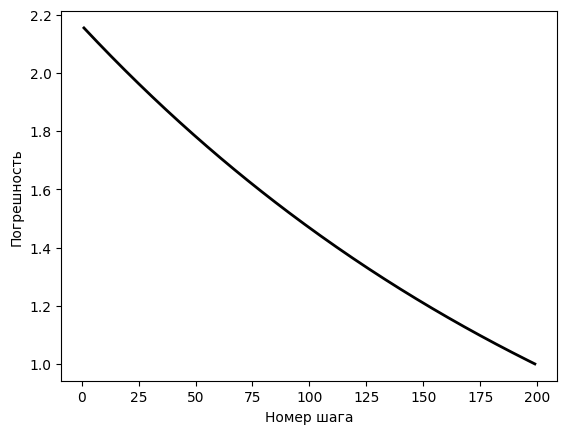

In [ ]:
#Подключаем необходимые библиотеки

import numpy as np 
from scipy import optimize 
import matplotlib.pyplot as plt 
import math

#Задаем уравнение, первую и вторую производные
def f1(x): 
  return (x-1)**2    
def f11(x): 
  return 2*x-2
def f111(x):
  return x
xf1_array=[] #массив значений корней
it_xf1=np.arange(1, 200) #массив итераций
for i in it_xf1: 
  r=newton(f1,2, maxiter=i,disp=0,fprime = f11, fprime2 = f111)    #Начинаем с 2, i-- максимальное количество итераций  
  r=r-1 #Корень уравнения для построения графика равен 1, вычтем его, чтобы получить ошибку для погрешности 
  xf1_array.append(r) 
y1=np.logspace(xf1_array[0],xf1_array[len(xf1_array)-1],num=len(xf1_array)) #Возвращаем массив

#Строим график и оси
plt.plot(it_xf1,y1, 'black',linewidth = 2)
plt.xlabel('Номер шага')
plt.ylabel('Погрешность')
pass

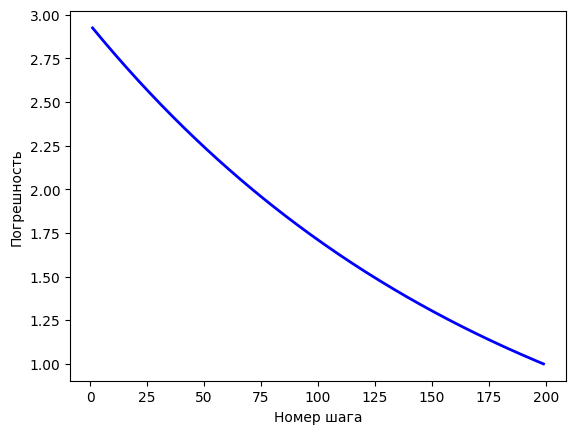

In [ ]:
#Задаем уравнение, первую и вторую производные
def f2(x): 
  return (math.exp(x)-1)**2 
def f21(x): 
  return 2*(math.exp(x)**2-math.exp(x))
def f211(x):
  return 2*(2*math.exp(x)**2-math.exp(x))
xf2_array=[] #массив значений корней
it_xf2=np.arange(1, 200) #массив итераций
for i in it_xf2: 
  r=newton(f2,1, maxiter=i,disp=0,fprime = f21, fprime2 = f211)    #Начинаем с 2, i-- максимальное количество итераций  
#Корень уравнения для построения графика равен 0, ничего не вычитаем 
  xf2_array.append(r) 
y2=np.logspace(xf2_array[0],xf2_array[len(xf2_array)-1],num=len(xf2_array)) #Возвращаем массив

#Строим график и оси
plt.plot(it_xf2,y2,'blue',linewidth = 2)
plt.xlabel('Номер шага')
plt.ylabel('Погрешность')
pass

**Таким образом, экспериментально итерации сходятся линейно, а не квадратично.**

## <strong>**Теоретическое доказательство**</strong>

Теорема о сходимости метода Ньютона

Чтобы численно решить уравнение $f(x)$ $=$$ 0$ методом простой итерации, его необходимо привести к эквивалентному уравнению $x$ $=$$\varphi(x)$ , где $\varphi$ - сжимающееся отображение.\
Для лучшей сходимости метода в точке очередного приближения $ x^{*} $ должно выполняться условие $ \varphi'(x^{*}) = 0 $. Решение данного уравнения ищут в виде: $ \varphi(x) = x + \alpha(x)f(x) $, тогда:\
$\varphi'(x^{*}) = 1 + \alpha'(x^{*})f(x^{*}) + \alpha(x^{*})f'(x^{*}) = 0 $\
В предположении, что точка приближения «достаточно близка» к корню $ \bar{x} $ и что заданная функция непрерывна $ (f(x^{*}) \approx f(\widetilde{x}) = 0)  $, окончательная формула для $ \alpha(x) $ такова:\
$ \alpha(x) = - \frac{1}{f'(x)} $\
C учетом этого функция $ \varphi(х) $ определяется:\
$ \varphi(x) = x - \frac{f(x)}{f'(x)} $\
При некоторых условиях эта функция в окрестности корня осуществляет сжимающее отображение.\
В этом случае алгоритм нахождения численного решения уравнения $f(x)$ $=$$ 0$ сводится к итерационной процедуре вычисления:\
$x_{n}=x_{n-1}-$ $\frac{f(x_{n-1})}{f'(x_{n-1})}$\
Построим для двух уравнений на графиках функцию, которая показывает сходимоть метода (если графики линейные, то и итерации сходятся линейно при применении метода Ньютона):\

**Первое уравнение:**\
$f(x)=(x-1)^{2}$\
$f'(x)=2x-2$\
$x-\frac{f(x)}{f'(x)}=x-\frac{(x-1)^{2}}{(2x-2)}=\frac{(x-1)}{2}$ \

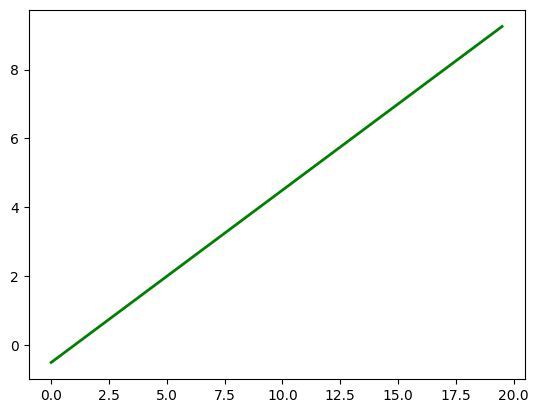

In [ ]:
y=[] #массив y
x=np.arange(0,20,0.5) #массив итераций
def f(x): 
  return (x-1)/2 
for i in x:
  y.append(f(i))
plt.plot(x,y,'green',linewidth = 2)    
pass

**Второе уравнение:**\
$f(x)=e^{2x}-2e^{x}+1$\
$f'(x)=2e^{2x}-2e^{x}$\
$x-\frac{f(x)}{f'(x)}=x-\frac{(e^{2x}-2e^{x}+1)}{(2e^{2x}-2e^{x})}=x+0.5\frac{1}{e^{x}}-\frac{1}{2}$

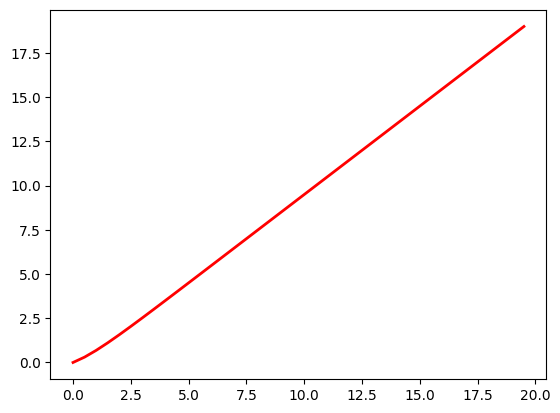

In [ ]:
y1=[] #массив y
x1=np.arange(0,20,0.5) #массив итераций
def f(x1): 
  return x1+0.5*pow(math.exp(x1),-1)-0.5
for i in x1:
  y1.append(f(i))
plt.plot(x1,y1,'red',linewidth = 2)    
pass

## <strong>**Вывод:**</strong>
из опытов и теоритических доказательств следует, что итерации сходятся линейно, а не квадратично.